<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de ordenamiento

Los problemas de ordenamiento desde hace mucho tiempo llevan siendo un desafío para los programadores ya que siempre se intenta buscar algún algoritmo el cual pueda resolverlos de la forma más rápida posible con el menor tiempo.

Por esta misma razón Martínez Vidal creo el metodo de ordenamiento por inserción el cual consiste en ordenar un arreglo de n números como si fuese un mazo de cartas.

Entrada: una secuencia de n números $[a_1, a_2,...,a_n]$

Salida: Retorna la misma secuencia de número ordenados de menor a mayor o viceversa.

#2. MergeSort


##2.1. Descripción del algoritmo

El MergeSort es un algoritmo recursivo el cual va dividiendo un arreglo de tamaño $n$ en sub-arreglos de largo $m = n/2$ hasta lograr un arreglo de tamaño 1, llegados a este punto la función llama a otra auxiliar llamada Merge la cual se encargará de reodenar los datos generados por los sub-arreglos recibidos hasta tener todos los datos ordenados del arreglo original de menor a mayor (o de mayor a menor dependiendo del caso).

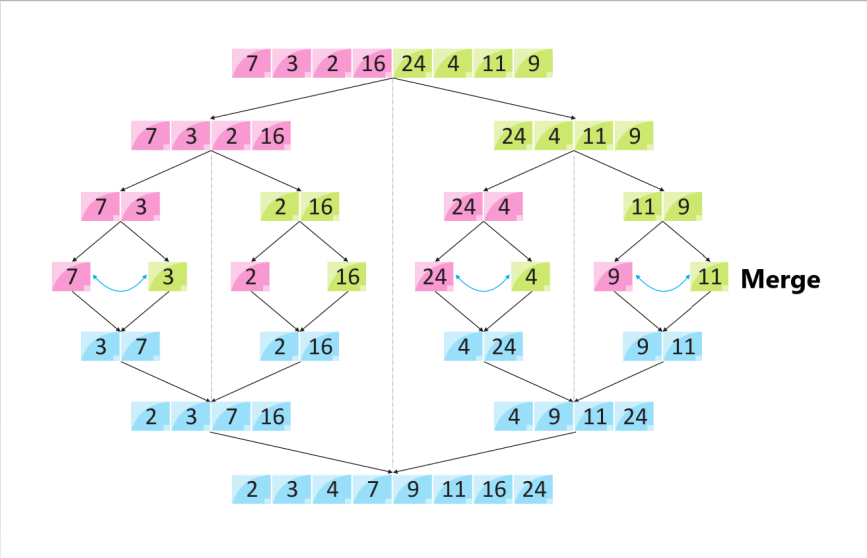

## 2.2. Codigo

In [ ]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored

In [154]:
def Merge(lista1, lista2, cont, verbose = False):
  i, j = 0, 0
  resultante = []

  if verbose:
    print("INGRESO DE LA FUNCIÓN MERGE\n")
    print("Entrada: Lista 1: ", str(lista1)[1:-1])
    print("         Lista 2: ", str(lista2)[1:-1], "\n")

  while (i < len(lista1) and j < len(lista2)):

    if verbose:
      if len(lista1) == 1 and len(lista2) == 1:
        print(colored(f"{str(lista1[i])}", "red"),"  <=  ",  colored(f"{str(lista2[j])}", "red"), "?")
      elif i == 0 and j == 0:
        print(colored(f"{str(lista1[i])}", "red"),",", str(lista1[i + 1:])[1:-1],"  <=  ",  colored(f"{str(lista2[j])}", "red"),",", str(lista2[j + 1:])[1:-1], "?")
      elif i == 0 and j > 0:
        print(colored(f"{str(lista1[i])}", "red"),",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"), ",",str(lista2[j + 1:])[1:-1], "?")
      elif i > 0 and j == 0:
        print(str(lista1[:i])[1:-1],",",colored(f"{str(lista1[i])}", "red"),",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"),",",str(lista2[j + 1:])[1:-1], "?")
      else:
        print(str(lista1[:i])[1:-1],",",colored(f"{str(lista1[i])}", "red"), ",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"),",",str(lista2[j + 1:])[1:-1], "?") 
      print("")

    if lista1[i] <= lista2[j]:
      resultante.append(lista1[i])
      cont += 1
      i += 1 
    else:
      resultante.append(lista2[j])
      cont += 1
      j += 1
    
    if verbose: 
      print("Resultante: ", colored(f"{str(resultante)[1:-1]}", "blue"), "\n")

  resultante += lista1[i:]
  resultante += lista2[j:]
  while (i < len(lista1)):
    if verbose:
      print(str(lista1[:i])[1:-1],",",colored(f"{str(lista1[i])}", "red"),",",str(lista1[i + 1:])[1:-1],"  <=", colored(f"ø") ,"?")
    cont += 1
    i += 1
  while (j < len(lista2)):
    if verbose:
      print(colored(f"ø", "red"),"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"), ",",str(lista2[j + 1:])[1:-1], "?")
    j += 1
    cont += 1

  if verbose: 
    print("Salida función Merge: ", colored(f"{str(resultante)[1:-1]}", "blue"), "\n")

  return resultante, cont

In [134]:
def MergeSort(lista,cont = 0, divisiones = 0,verbose = False):
  if (len(lista) == 1): return lista, cont, divisiones
  divisiones += 1

  if verbose:
    print("Entrada: ", str(lista)[1:-1], "\n")

  q = len(lista) // 2
  if verbose: 
    print("Parte Derecha: ", colored(f"{str(lista[:q])[1:-1]}", "green"))
    print("Parte Izquierda: ", colored(f"{str(lista[q:])[1:-1]}", "yellow"), "\n")

  listaD, cont, divisiones = MergeSort(lista[:q],cont,divisiones,verbose)
  listaI, cont, divisiones = MergeSort(lista[q:],cont,divisiones,verbose)

  lista, cont = Merge(listaD, listaI, cont,verbose)
  return lista, cont, divisiones

##2.3. Ejemplo

Para comenzar utilizaremos el siguiente arreglo.

$A = [4,8,1,2,3,5]$

Al ser recibido por la función MergeSort este los dividirá en 2 sub-arreglos los cuales volverán a ser divididos hasta que quede 1 en cada lado.

$[4,8,1] ... [2,3,5]$

$[4,8] ... [1] ... [2,3] ... [5]$

$[4] ... [8] ... [1] ... [2] ... [3] ... [5]$

Luego de dejar el arreglo anterior subdividido en arreglos de largo 1 la Función MergeSort hará el llamado de la función Merge la cual se encargará de reodenar todos los arreglos.

$[4,8] ... [1,2] ... [5]$

$[1,2,4,8] ... [5]$

$A = [1,2,4,5,8]$

Y una vez que el codigo ya haya reordenado todos los elementos de menor a mayor de los sub-arreglos este finalizará su ejecución.








##2.4. Ejecución del algoritmo paso a paso (Verbose = True)

In [149]:
A = [4,8,1,2,3,5]

A = MergeSort(A, verbose= True)

Entrada:  4, 8, 1, 2, 3, 5 

Parte Derecha:  4, 8, 1
Parte Izquierda:  2, 3, 5 

Entrada:  4, 8, 1 

Parte Derecha:  4
Parte Izquierda:  8, 1 

Entrada:  8, 1 

Parte Derecha:  8
Parte Izquierda:  1 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  8
         Lista 2:  1 

8   <=   1 ?

Resultante:  1 

 , 8 ,    <= ø ?
Salida función Merge:  1, 8 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  4
         Lista 2:  1, 8 

4 ,    <=   1 , 8 ?

Resultante:  1 

4 ,    <=   1 , 8 ,  ?

Resultante:  1, 4 

ø   <=   1 , 8 ,  ?
Salida función Merge:  1, 4, 8 

Entrada:  2, 3, 5 

Parte Derecha:  2
Parte Izquierda:  3, 5 

Entrada:  3, 5 

Parte Derecha:  3
Parte Izquierda:  5 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  3
         Lista 2:  5 

3   <=   5 ?

Resultante:  3 

ø   <=    , 5 ,  ?
Salida función Merge:  3, 5 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  2
         Lista 2:  3, 5 

2 ,    <=   3 , 5 ?

Resultante:  2 

ø   <=    , 3 , 5 ?
ø   <=   3 , 5 ,  ?
Salida fun

#3. Tiempo de Ejecución

##Teorema (Tiempo de ejecución)

El tiempo de ejecución de todos los casos del MergeSort tienen una complejidad de $O(nlogn)$.

###**Árbol de recurrencia**

Para poder entender la complejidad temporal de forma intuitiva podemos hacer uso de un árbol de recurrencia, el cual nos mostrará explicitamente la cantidad de operaciones que necesitaremos realizar en nuestro algorimo.

Primero, reemplazamos las complejidad $O(1)$ por una constante $c$ y las complejidades $O(n)$ por el termino $c*n$. 

$T(n) = \begin{cases}
  c  & n \text{ is small} \\
  2 T(n/2) + c \cdot n & \text{ otherwise}
\end{cases}$

Luego podemos apreciar el árbol de recursividad al hacer uso de la función definida anteriormente.

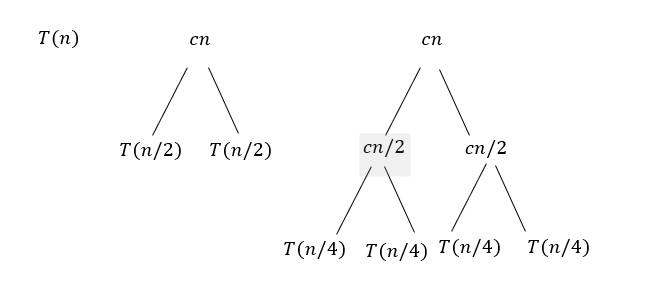

Hasta conseguir el árbol y los valores aproximados de sus operaciones.

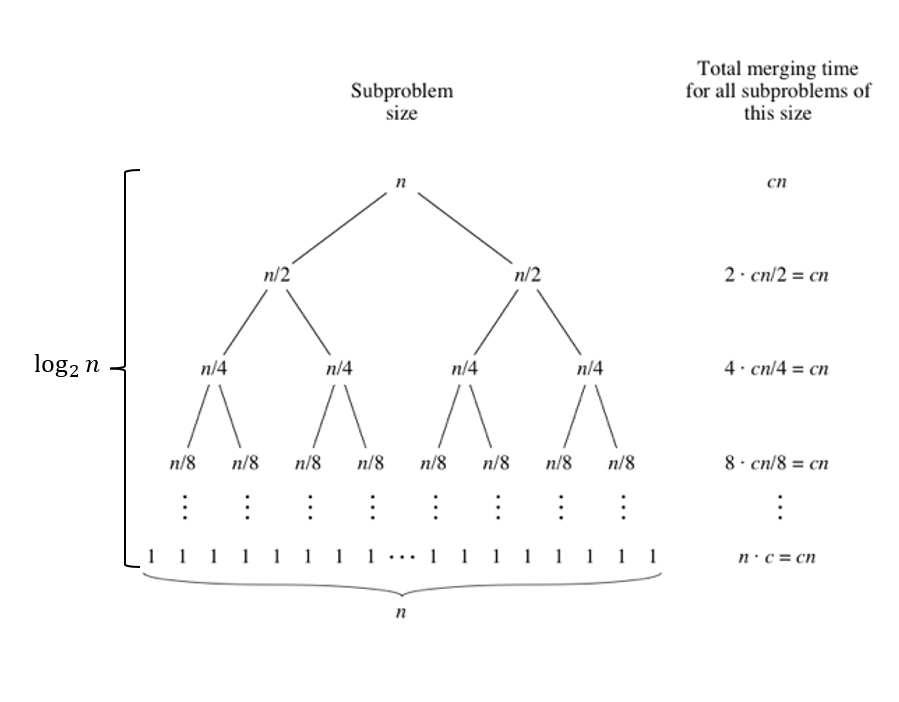

Finalmente analizando el árbol de recursión podemos decir que la suma de todos los tiempode es: $cn \log_2 n \rightarrow O(n \log n)$.

##Prueba del teorema

Teniendo en cuenta el funcionamiento del algoritmo, este no nos deja del todo claro cual es su mejor caso, peor caso o caso promedio ya que sin importar que tan ordenado se encuentre si o si el arreglo principal será subdividido hasta conseguir arreglos de tamaño 1. Por esta razón comprobaremos que el teorema mencionado anteriormente es verdadero con algunos casos de prueba.

In [155]:
for n in range(1,15):
  x = rd.sample(range(1,100), n)
  x, cont, divisiones = MergeSort(x)
  n * mt.log2(n)
  print("Caso",n,":",x)
  print("Comparaciones =", cont, ", Aproximación matemática =", (n * mt.log2(n)) // 1, "\n")

Caso 1 : [52]
Comparaciones = 0 , Aproximación matemática = 0.0 

Caso 2 : [48, 73]
Comparaciones = 2 , Aproximación matemática = 2.0 

Caso 3 : [42, 71, 92]
Comparaciones = 5 , Aproximación matemática = 4.0 

Caso 4 : [12, 25, 27, 38]
Comparaciones = 8 , Aproximación matemática = 8.0 

Caso 5 : [22, 52, 58, 71, 80]
Comparaciones = 12 , Aproximación matemática = 11.0 

Caso 6 : [7, 12, 80, 82, 87, 88]
Comparaciones = 16 , Aproximación matemática = 15.0 

Caso 7 : [18, 29, 38, 56, 75, 84, 89]
Comparaciones = 20 , Aproximación matemática = 19.0 

Caso 8 : [3, 5, 17, 24, 25, 27, 38, 51]
Comparaciones = 24 , Aproximación matemática = 24.0 

Caso 9 : [19, 24, 28, 32, 50, 79, 90, 94, 95]
Comparaciones = 29 , Aproximación matemática = 28.0 

Caso 10 : [6, 7, 9, 11, 15, 53, 60, 72, 91, 94]
Comparaciones = 34 , Aproximación matemática = 33.0 

Caso 11 : [36, 52, 58, 62, 66, 71, 85, 86, 89, 92, 96]
Comparaciones = 39 , Aproximación matemática = 38.0 

Caso 12 : [6, 11, 16, 29, 31, 37, 48, 60, 63

Como se puede apreciar en todos los casos de prueba anteriores, el número de comparaciones y de divisiones dentro de la función merge es semejante a la aproximación matemática que nos da la complejidad. Por lo tanto podemos asumir que la complejidad tanto del mejor como del peor caso es exactamente la misma $O(nlogn)$.




#4. Correctitud

**Teorema de (Correctitud)**

El algoritmo MergeSort genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismo elementos del arreglo de entrada ordenados de menor a mayor, es decir, $a_1'\leq a_2'\leq...\leq a_n'$.

#Prueba del Teorema

Previamente observamos que el algoritmo por cada llamada a la función MergeSort el arreglo ser irá subdividiendo hasta obtener arreglos de tamaño 1 y poco a poco la función merge los irá ordenando.

Por lo tanto para demostrar la correctitud de la función MergeSort utilizaremos el método de demostración por inducción matemática y para la función Merge se utilizará la propiedad del bucle invariante.

##Prueba del teorema (Función Merge)

La función Merge tiene como entrada 2 arreglos los cuales serán ordenados de dentro de un nuevo arreglo.

Su proposito es buscar dentro de cada arreglo el menor valor para que de esta forma ser colocado en el arreglo resultante.

Para probarlo con la propiedad del bucle invariante, primero debes analizar la inicialización $(i = 0$ y $j = 0)$ de nuestro bucle y por último comprobar si este se mantiene durante la ejecución del mismo.


> Al comienzo de cada iteración $i$ y $j$ del bucle donde $i$ es el indice del primer arreglo y $j$ del segundo, el arreglo resultante debe encontrarse ordenado de menor a mayor.

**Inicialización**

Al comienzo de la primera iteración $(i = 0$ y $j = 0)$, los $i + j$ primeros elementos del nuevo arreglo se encontrarán ordenados. Esto es trivialmente cierto ya que estamos considerando un solo elemento.

**Mantención**

Empezamos considerando que al principio de cada iteración $i$ y $j$ se cumple la propiedad, es decir que los primeros elementos del arreglo resultante se encuentran ordenados de menor a mayor. En este caso consideraremos a $X$ como menor dato y a $Y$ como mayor de los dos arreglos (como se muestra en la figura).

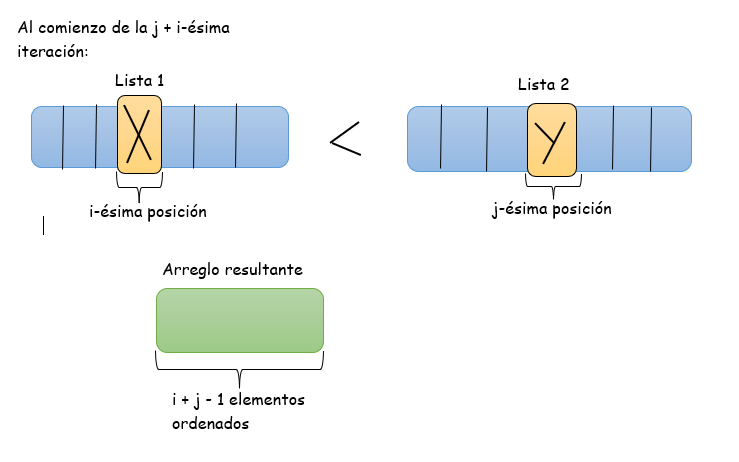

Durante la iteración de la función Merge el menor dato de los dos arreglos (osea $X$) será posicionado al final del arreglo resultante.

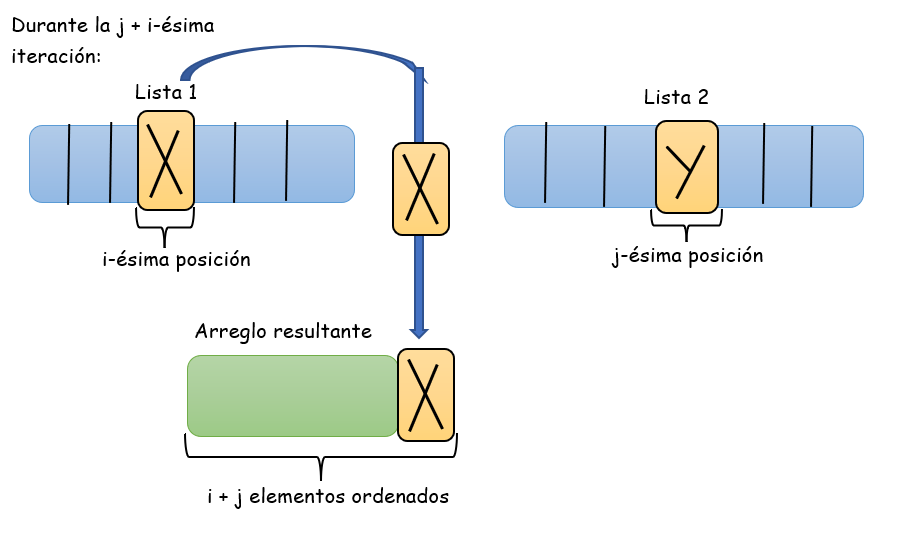

Al finalizar la iteración (y al comienzo de la siguiente), se seguirá cumpliendo la prioridad invariante.

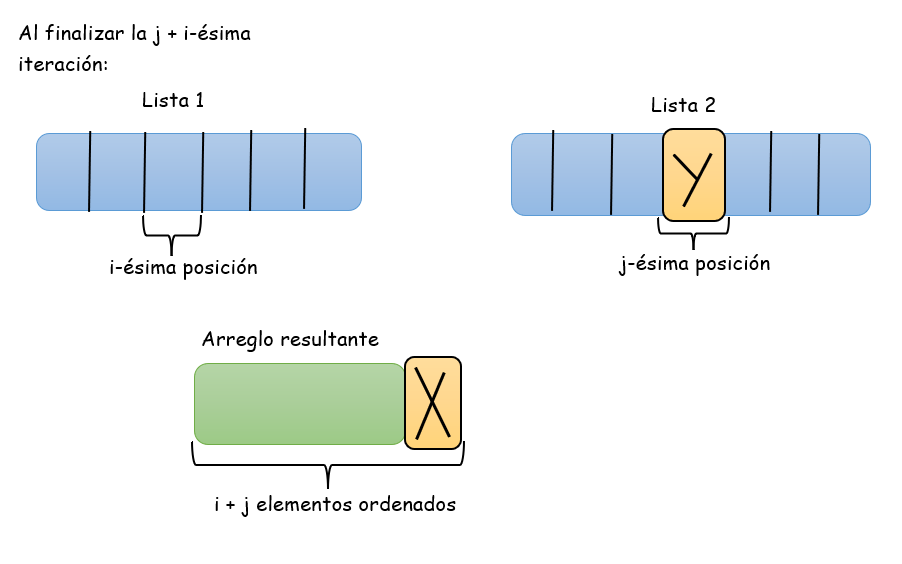








##Prueba del teorema (Función MergeSort)

En inducción matemática para probar una declaración $P(n)$, para todos los números naturales $n$ debemos realizar los siguientes pasos.

1.   Probar $P(n)$ con un caso base, por ejemplo $P(1)$.
2.   Probar si $P(m)$ es cierto para $m < n$, por lo tanto para $P(n)$ esto también estará correcto.

para nuestro caso base $P(1)$, como la función MergeSort recibe un arreglo de largo 1, está considera directamente que se encontrará ordenado. Por lo tanto se cumple $P(1)$.

Para nuestro segundo caso, considerando que nuestra función MergeSort recibe un arreglo de largo $n$, este lo irá subdividiendo en subarreglos de tamaño $m = [\frac{n}{2}]$ hasta conseguir arreglos de largo 1 para luego ser combinados y reordenados con la función Merge la cual ya tiene comprobada su correctitud.

#5. Experimentos

##5.1. Números de comparaciones

A continuación se muestra gráficamente una comparación entre:


*   Cantidad de comparaciones para entradas aleatorias, realizadas experimentalmente.
*   Comparación entre el tiempo de ejecución del algoritmo InsertionSort y MergeSort.
*   Comparación entre la cantidad de comparaciones entre InsertionSort y MergeSort.

Para problemas con $n ∈ [5,100]$

Los arreglos de entrada son:

*   Mejor caso: La secuencia será un arreglo oredenado de 0 hasta $n - 1$.
*   Peor caso: La secuencia será un arreglo odenado de $n - 1$ hasta 0.
*   Caso aleatorio: La secuancia será un arreglo de números aleatorios entre 1 y 100, con $n$ cantidad de elementos.


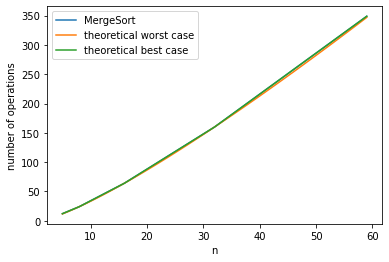

In [162]:
import matplotlib.pyplot as plt

x=[n for n in range(5,60)] 
y1=[n* mt.log2(n) for n in range(5,60)] # worst case
y2= []
y=[];

for n in range(5,60):
  a = rd.sample(range(1, 100), n)
  a,counter, divisiones = MergeSort(a)
  y.append(counter)
  b, counter2,divisiones2 =  MergeSort(list(range(0, n)))
  y2.append(counter2)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

Como podemos apreciar en el siguiente grafico, el mejor caso, peor caso y el caso aleatorio contienen la misma catidad de comparaciones, por lo tanto, esto demuestra que realmente la complejidad temporal de nuestra función viene siendo $O(n\log_2n)$.

##Comparaciones entre la función MergeSort e InsertionSort

Los arreglos de entrada son:

**InsertionSort**
*  Mejor caso: La secuencia será un arreglo ordenado de 0 hasta $n - 1$.
*  Peor caso: La secuencia será un arreglo ordenado de $n - 1$ hasta 0.
*  Caso aleatorio: La secuancia será un arreglo de números aleatorios entre 1 y 100, con $n$ cantidad de elementos.

**MergeSort**

Como fue comprobado anteriormente MergeSort no tiene mejor o peor caso, por esta razón sus arreglos de entrada serán casos aleatorios.

##Código InsertionSort

In [151]:
def InsertionSort(a, verbose = False):
    n = len(a)
    T = 0 #contador de comparaciones
    if verbose:
      print("Antes de comenzar")
      print(colored(f"{str(a[:1])[1:-1]}", "green"), ",", str(a[1:])[1:-1])

    for i in range(1,n): #Comienzo de cada iteración de i, bucle mayor
      key = a[i]
      if verbose:
        print("\nIteración",i)
        if i == n-1:
          print(str(a[:i])[1:-1], ",", colored(f"{str(a[i:i+1])[1:-1]}", "red"), end= '')
        else:
          print(str(a[:i])[1:-1], ",", colored(f"{str(a[i:i+1])[1:-1]}", "red"), ",", str(a[i+1:])[1:-1], end= '')
        print("   key:", colored(f"{key}", "red"))
        print("Comparaciones")

      for k in range(i-1,-1,-1):#Inicio de las comparaciones
        T += 1
        if a[k] < key: #Si es verdad
          a[k+1] = key    #key toma el lugar que le corresponde, a la derecha del elemento actual
          if verbose:
            print(str(a[:k+1])[1:-1], ",", colored(f"{str(a[k+1:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", colored(f"{key}", "blue"))

          break           #En este caso se rompe este ciclo para ubicar otro key

        a[k+1] = a[k]  #Si es falso, el elemento de la mano ordenada se "mueve a la derecha"(se copia)
        if verbose:
          if k == 0:
            print(colored(f"{str(a[k:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", key)
          else:
            print(str(a[:k])[1:-1], ",", colored(f"{str(a[k:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", key)

      if key < a[0]:   
        T += 1         #Si se movieron a la derecha todos los elementos porque key era el más pequeño
        a[0] = key     #Entonces se concluye este ciclo colocándo a la key en la primer posición

        if verbose:
            print(colored(f"{str(a[0:1])[1:-1]}", "blue"), ",", str(a[1:])[1:-1], "   key:", colored(f"{key}", "blue"))
      if verbose:
        print("Al finalizar iteración")
        if i != n-1:
            print(colored(f"{str(a[:i+1])[1:-1]}", "green"), ",", str(a[i+1:])[1:-1])
        else:
            print(colored(f"{str(a[:i+1])[1:-1]}", "green"))

    if verbose:
      print("\nArreglo ordenado!")
      print(str(a[:]))
    return a, T

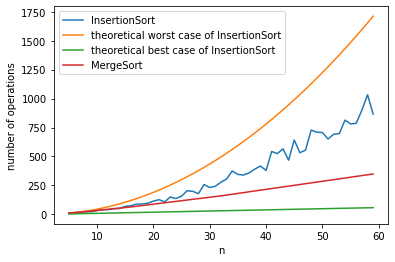

In [158]:
x=[n for n in range(5,60)] 
y1=[n*(n-1)/2 for n in range(5,60)] # worst case
y2=[n-1 for n in range(5,60)] # best case
y=[]; 
y3 = []

for n in range(5,60):
  a = rd.sample(range(1, 100), n)
  b = a.copy()
  a,counter = InsertionSort(a)
  b,counter2, divisiones = MergeSort(b)
  y.append(counter)
  y3.append(counter2)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["InsertionSort", "theoretical worst case of InsertionSort", "theoretical best case of InsertionSort", "MergeSort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

**Análisis de los resultados**

En el grafico podemos apreciar como la función Merge en promedio es más estable a la hora de ordenar datos en comparación a la función InsertionSort, eso si, cabe recalcar que este algoritmo decae contra el mejor caso teorico del InsertionSort y además que la función MergeSort tiene una notoria utilización de memoria ya que para poder ordenar los dato con la función Merge, está genera nuevos arreglos para poder almacenar los datos ordenados.

##5.2. Tiempo de ejecución (Experimental)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo MergeSort en función del tamaño del problema para arreglos generados aleatoreamente de largos entre 5 y 200.

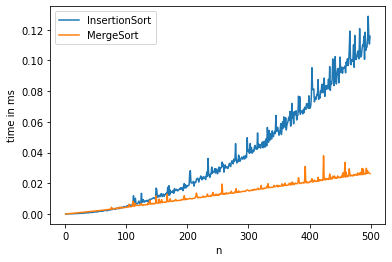

In [161]:
x=[]; y=[]
y2=[]

for n in range(1,500):

  a = rd.sample(range(1, 1000), n)
  b = a.copy()

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import InsertionSort", stmt=f"InsertionSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["InsertionSort", "MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

En este grfico podemos apreciar nuevamente como la función MergeSort supera a la función InsertionSort, sobre todo para arreglos con tamaños muy grandes ya que Insertion tiene una complejidad $O(n^2)$ la cual aumenta mucho más rapido en comparación a la complejidad del MergeSort que es $O(nlog_2n)$.

Cabe recalcar que los peaks que se aprecian en el grafico son gracias a los procedimientos externos del entorno de ejecución ya que si uno ejecuta el codigo varias veces los peaks poco a poco se van eliminando.